# Arion Melkan de Freitas

Para a questão de **Estatística para Ciências de Dados** e **Aprendizado Dinâmico**, sugerem-se alguns comandos e passos em Python a seguir. Outros comandos podem ser usados conforme a necessidade.

**Algumas instruções**

- Salve este arquivo .ipynb e os dados indicados no enunciado da sua questão no moodle na mesma pasta na sua máquina local.

- Responda às questões no moodle com base nos resultados obtidos nas suas análises. 

- Você deverá fazer o upload do arquivo de notebook .ipynb para conferência posterior, nos casos em que as correções automatizadas configuradas no sistema não levem em consideração diferentes versões do mesmo método estatístico implementadas em Python.

Boa prova!

Mariana e Cibele

In [1]:
# Instale os pacotes abaixo nas versões indicadas

!pip install statsmodels==0.11.1
!pip install scipy==1.4.1
!pip install pmdarima==1.7.1

In [2]:
# Carregue as bibliotecas 

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols

import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse

from pmdarima import auto_arima

import seaborn as sns

sns.set()

**Baixe os dados indicados no link indicado no enunciado da sua questão no moodle e salve como 'dados.csv'**

As variáveis da base de dados são

Y: produção mensal de grãos (toneladas)

X: tempo desde o início do registro (meses)

D: 0, se a observação faz parte dos 10 primeiros anos (primeira década) e 1 se faz parte dos 10 últimos anos (última década)

In [3]:
dados = pd.read_csv('dados.csv',index_col=0)
dados.head()

X         Y    D
1980-01-31  0.0  0.572232  0.0
1980-02-29  1.0  2.425839  0.0
1980-03-31  2.0  3.847004  0.0
1980-04-30  3.0  2.933853  0.0
1980-05-31  4.0  7.916690  0.0

In [4]:
dados.plot.scatter('X','Y');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [5]:
# Separando os dados das décadas de 80 e 90
dados_80 = dados[dados['D'] == 0]['Y']
dados_90 = dados[dados['D'] == 1]['Y']

media_80 = dados_80.mean()
media_90 = dados_90.mean()

print(f'Média da década de 80 = {media_80:.2f}'
      f'\nMédia da década de 90 = {media_90:.2f}')

Média da década de 80 = 66.44
Média da década de 90 = 198.33


**Teste t de Student (bicaudal) para média de duas populações Normais com variâncias diferentes.**

**Comando sugerido: stats.ttest_ind**

**A variável D indica se a observação faz parte das 10 primeiros anos (primeira década) e 1 se faz parte dos 10 últimos anos (última década)**

In [6]:
# Método T - Student - devolve a estatística do teste e o p_valor - Identificar se duas amostras possuem a mesma média com
# variâncias iguais
f_t_student = lambda x, y: stats.ttest_ind(x, y)

result_ts = f_t_student(dados_80, dados_90)

print(f'Estatística do teste = {result_ts[0]:.2f}\n'
      f'P-valor = {result_ts[1]:.2f}')

Estatística do teste = -26.70
P-valor = 0.00


**Teste de Levene**

**Comando sugerido: stats.levene**

In [7]:
# Método levene - devolve a estatística do teste e o p_valor - Identificar se duas amostras possuem mesma variância
f_levene = lambda x, y: stats.levene(x, y)

result_l = f_levene(dados_80, dados_90)

print(f'Estatística do teste = {result_l[0]:.2f}\n'
      f'P-valor = {result_l[1]:.2f}')

Estatística do teste = 0.02
P-valor = 0.88


**Ajuste o modelo de regressão linear simples** 

**Comando sugerido: ols**

In [8]:
mod = ols('Y ~ X',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.638e+05
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:54:00   Log-Likelihood:                -471.40
No. Observations:                 240   AIC:                             946.8
Df Residuals:                     238   BIC:                             953.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0459      0.223      4.692      0.0

In [9]:
# Calcule os valores preditos de E(Y)
ypred=res.fittedvalues

# Obtenha o resíduo = observado-ajustado
residuo = res.resid

dados['residuo'] = residuo

In [10]:
# Meus dados - Prova
print(ypred[np.round(ypred, 2) == 259.32])

# Minha prova estava com o item 3, vou responder pelo item 3 essa.
print(ypred[np.round(ypred, 2) == 132.92])

1999-08-31    259.324777
dtype: float64
Series([], dtype: float64)


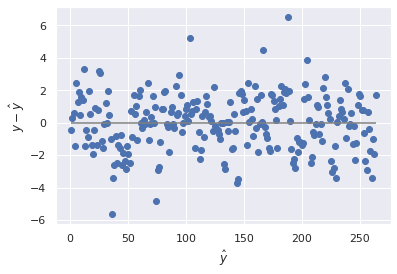

In [11]:
plt.scatter(ypred, residuo);
plt.xlabel('$\hat{y}$');
plt.ylabel('$y-\hat{y}$');
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray');

**Verifique a suposição de distribuição Normal dos resíduos**

**Comando sugerido: stats.probplot**

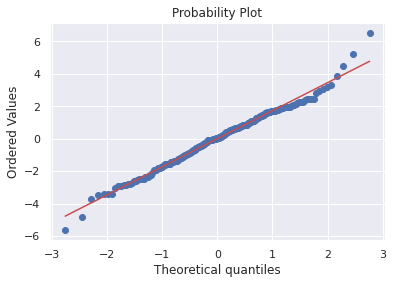

<Figure size 576x360 with 0 Axes>

In [12]:
stats.probplot(dados['residuo'], plot=plt)
fig = plt.figure(figsize=(8,5));

**Verifique os gráficos de autocorrelação e autocorrelação parcial dos resíduos.** 

**Comandos sugeridos: plot_acf e plot_pacf**

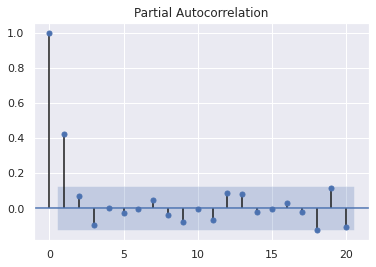

In [13]:
lags=20
plot_acf(dados['residuo'],lags=lags);
plot_pacf(dados['residuo'],lags=lags);

**Indique qual a ordem mais adequada de um modelo ARIMA(p,d,q) para os resíduos.**

**Use a função auto_arima e stepwise, como feito em aula.**

In [14]:
auto_arima(dados['residuo'], seasonal=False, m=1).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -448.103
Date:                Sat, 12 Dec 2020   AIC                            900.207
Time:                        21:54:02   BIC                            907.168
Sample:                             0   HQIC                           903.012
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4200      0.061      6.877      0.000       0.300       0.540
sigma2         2.4486      0.180     13.586      0.000       2.095       2.802
===================================================================================
Ljung-Box (Q):                       49.55   Jarque-Bera (JB):                13.08
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.19
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
stepwise_fit_r = auto_arima(dados['residuo'], start_p=0, start_q=0,
                          max_p=6, max_q=4, m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit_r.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=944.792, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=900.207, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=911.971, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=901.082, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=901.450, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=901.608, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=902.206, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.307 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -448.103
Date:                Sat, 12 Dec 2020   AIC                            900.207
Time:                        21:54:02   BIC                            907.168
Sample:                             0   HQIC                           903.012
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4200      0.061      6.877      0.000       0.300       0.540
sigma2         2.4486      0.180     13.586      0.000       2.095       2.802
===================================================================================
Ljung-Box (Q):                       49.55   Jarque-Bera (JB):                13.08
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.19
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Divida a base em treino e teste, separando 80% das observações para treino.**

In [16]:
dados_treino = dados.iloc[:round((len(dados) * 0.8))]
dados_teste = dados.iloc[round((len(dados) * 0.8)):] 

In [17]:
print(f'Treino = {dados_treino.shape}\n'
      f'Teste =  {dados_teste.shape}')

Treino = (192, 4)
Teste =  (48, 4)


**Obtenha a ordem do melhor modelo ARIMA (p,d,q) para a variável resposta Y considerando somente a base de treino.**


In [18]:
stepwise_fit_y = auto_arima(dados_treino['Y'], start_p=0, start_q=0,
                          max_p=6, max_q=4, m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit_y.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=790.730, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=769.986, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=755.395, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=843.844, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=845.843, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.513 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -374.697
Date:                Sat, 12 Dec 2020   AIC                            755.395
Time:                        21:54:04   BIC                            765.152
Sample:                             0   HQIC                           759.347
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0942      0.044     24.950      0.000       1.008       1.180
ma.L1         -0.6497      0.057    -11.490      0.000      -0.761      -0.539
sigma2         2.9529      0.264     11.204      0.000       2.436       3.469
===================================================================================
Ljung-Box (Q):                       60.18   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.02   Prob(JB):                         0.19
Heteroskedasticity (H):               1.41   Skew:                            -0.06
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Treinando com o melhor modelo
modelo = ARIMA(dados_treino['Y'],order=(0,0,1))

resultado = modelo.fit()
resultado.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      Y   No. Observations:                  192
Model:                     ARMA(0, 1)   Log Likelihood                -934.546
Method:                       css-mle   S.D. of innovations             31.025
Date:                Sat, 12 Dec 2020   AIC                           1875.091
Time:                        21:54:04   BIC                           1884.864
Sample:                    01-31-1980   HQIC                          1879.049
                         - 12-31-1995                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.0822      4.466     23.751      0.000      97.328     114.836
ma.L1.Y        1.0000      0.015     65.616      0.000       0.970       1.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

**Obtenha o erro quadrático médio das previsões das observações da base de teste.**

In [20]:
inicio=len(dados_treino)
fim=len(dados_treino)+len(dados_teste)-1

previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels')
previsões.index = dados_teste.index

In [21]:
error = rmse(dados_teste['Y'], previsões)
print(f'Erro RMSE {error:.2f}')

Erro RMSE 131.79
